# <font color='orange'>Projetos de Análise de Dados com Linguagem Python</font>
# <font color='orange'>Projeto 8 - Técnicas de Visualização de Dados</font>

## Pacotes Python Usados no Projeto

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Carregando os Dados

> Estamos importando o dataset gerado ao final do Projeto 7.

In [2]:
# Carregando os dados
dados = pd.read_csv("resultado_projeto7.csv")

In [3]:
# Visualizando os dados
dados.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,number_outpatient,number_emergency,number_inpatient,number_diagnoses,change,diabetesMed,readmitted,comorbidade,num_alt_dosagem_med,num_med
0,149190,55629189,Caucasian,0,[0-50),Emergencia,Casa,Sala_Emergencia,3,59,...,0,0,0,9,1,1,1,1,1,1
1,64410,86047875,AfricanAmerican,0,[0-50),Emergencia,Casa,Sala_Emergencia,2,11,...,2,0,1,6,0,1,0,1,0,1
2,500364,82442376,Caucasian,1,[0-50),Emergencia,Casa,Sala_Emergencia,2,44,...,0,0,0,7,1,1,0,3,1,1
3,16680,42519267,Caucasian,1,[0-50),Emergencia,Casa,Sala_Emergencia,1,51,...,0,0,0,5,1,1,0,1,0,2
4,35754,82637451,Caucasian,1,[50-60),Outro,Casa,Outro,3,31,...,0,0,0,9,0,1,1,3,0,1


In [4]:
# Shape
dados.shape

(68629, 22)

In [5]:
# Info
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68629 entries, 0 to 68628
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   encounter_id              68629 non-null  int64 
 1   patient_nbr               68629 non-null  int64 
 2   race                      68629 non-null  object
 3   gender                    68629 non-null  int64 
 4   age                       68629 non-null  object
 5   admission_type_id         68629 non-null  object
 6   discharge_disposition_id  68629 non-null  object
 7   admission_source_id       68629 non-null  object
 8   time_in_hospital          68629 non-null  int64 
 9   num_lab_procedures        68629 non-null  int64 
 10  num_procedures            68629 non-null  int64 
 11  num_medications           68629 non-null  int64 
 12  number_outpatient         68629 non-null  int64 
 13  number_emergency          68629 non-null  int64 
 14  number_inpatient      

#### 1- Total de Medicamentos Consumidos Por Faixa Etária

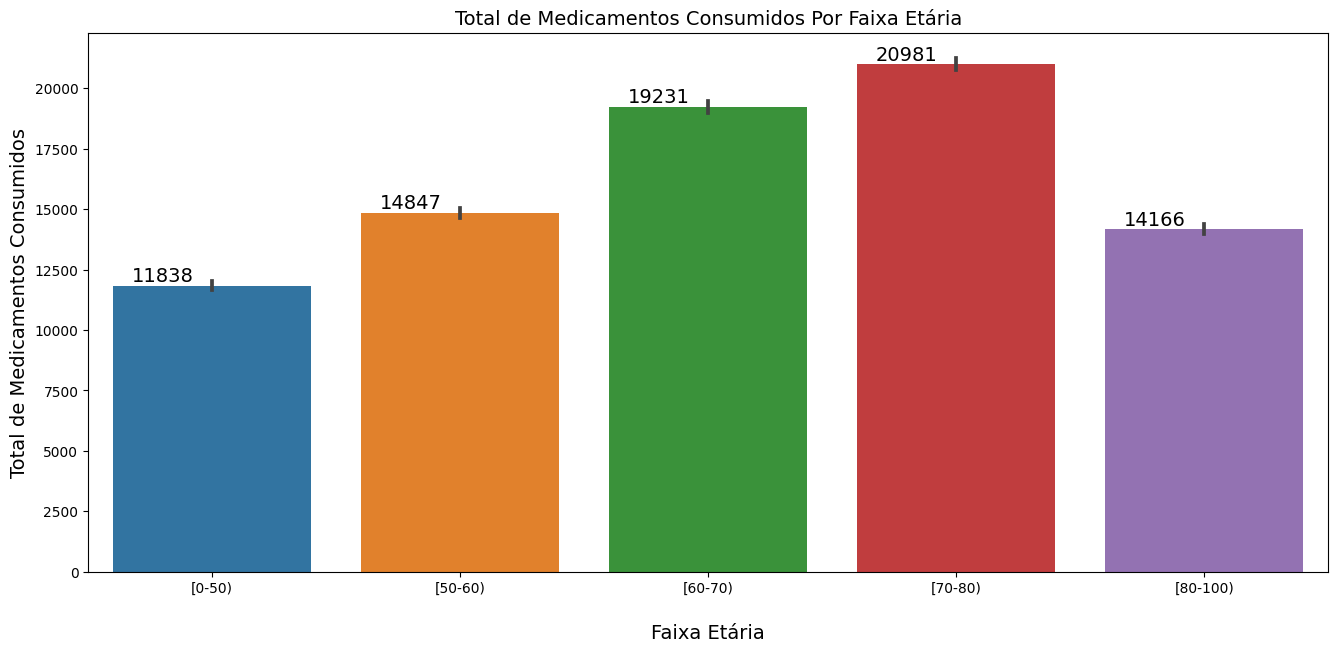

In [6]:
# Gráfic de Barras Coloridas

# Tamanho da figura
plt.figure(figsize = (16,7))

# Criação do gráfico de barras
figx = sns.barplot(x = 'age', y = 'num_med', estimator = np.sum, data = dados)

# Label do eixo x
plt.xlabel("\nFaixa Etária", fontsize = 14, color = 'black')

# Label do eixo y
plt.ylabel("Total de Medicamentos Consumidos", fontsize = 14, color = 'black')

# Título
plt.title("Total de Medicamentos Consumidos Por Faixa Etária", fontsize = 14, color = 'black')

# Coloca os totais em cada uma das barras como labels
for p in figx.patches:
    figx.annotate('{:.0f}'.format(p.get_height()), 
                  (p.get_x() + 0.2, p.get_height()), 
                  ha = 'center', 
                  va = 'bottom', 
                  fontsize = 14,
                  color = 'black')

# Mostra o gráfico
plt.show()


> A faixa etária de pacientes entre 70-80 é a que mais consome medicamentos.

#### 2- Total de Readmissões de Pacientes Diabéticos Por Gênero

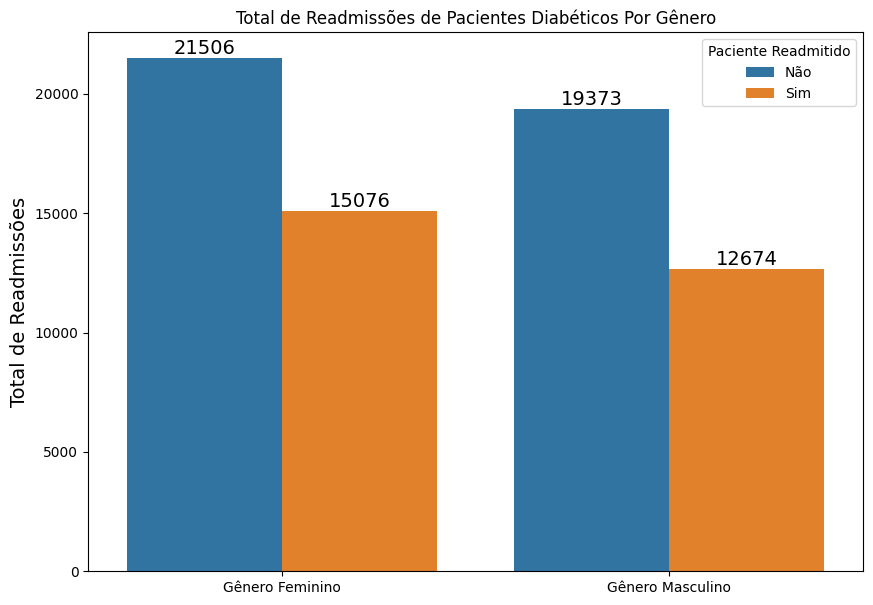

In [7]:
# Count Plot (Gráfico de Barras Para Variáveis Categóricas)

# Criação do gráfico de barras com label encoding
figx = sns.countplot(x = [('Gênero Feminino' if x == 0 else 'Gênero Masculino') for x in dados['gender']], 
                     hue = 'readmitted', 
                     data = dados) 

# Tamanho da figura em polegadas
figx.figure.set_size_inches(10,7)

# Legenda
figx.legend(title = 'Paciente Readmitido', labels = ('Não', 'Sim'))

# Label do eixo y
plt.ylabel("Total de Readmissões", fontsize = 14, color = 'black')

# Título
figx.axes.set_title('Total de Readmissões de Pacientes Diabéticos Por Gênero')

# Coloca os totais em cada uma das barras como labels
for p in figx.patches:
    figx.annotate('{:.0f}'.format(p.get_height()), 
                  (p.get_x() + 0.2, p.get_height()), 
                  ha = 'center', 
                  va = 'bottom', 
                  fontsize = 14,
                  color = 'black')
    
# Mostra o gráfico
plt.show()

> Pacientes do gênero feminino têm número maior de readmissões.

#### 3- Total de Readmissões de Pacientes Por Faixa Etária

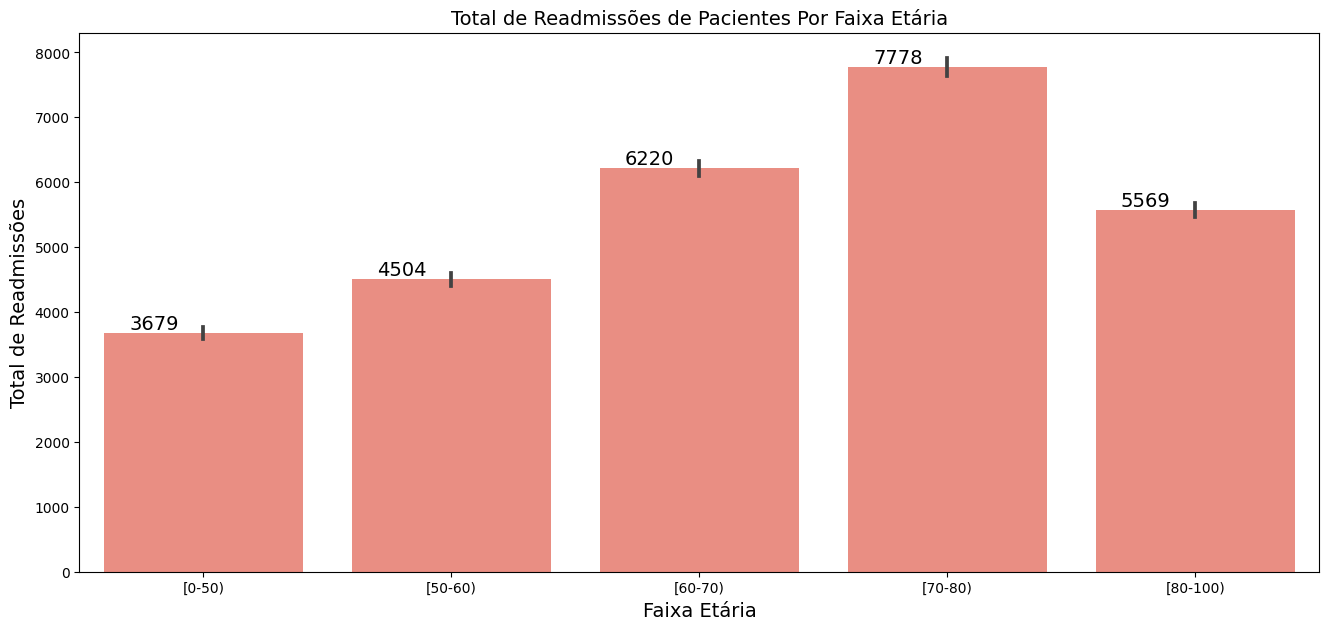

In [8]:
# Gráfico de Barras de Uma Única Cor

# Tamanho da figura
plt.figure(figsize = (16,7))

# Criação do gráfico de barras 
figx = sns.barplot(x = 'age', y = 'readmitted', estimator = np.sum, data = dados, color = 'salmon')

# Label do eixo x
plt.xlabel("Faixa Etária", fontsize = 14, color = 'black')

# Label do eixo y
plt.ylabel("Total de Readmissões", fontsize = 14, color = 'black')

# Título
plt.title("Total de Readmissões de Pacientes Por Faixa Etária", fontsize = 14, color = 'black')

# Coloca os totais em cada uma das barras como labels
for p in figx.patches:
    figx.annotate('{:.0f}'.format(p.get_height()), 
                  (p.get_x() + 0.2, p.get_height()), 
                  ha = 'center', 
                  va = 'bottom', 
                  fontsize = 14,
                  color = 'black')

# Mostra o gráfico
plt.show()

> A faixa etária de pacientes entre 70-80 é a que tem o maior número de readmissões.

#### 4- Percentual de Readmissões/Não Readmissões de Pacientes Por Faixa Etária

In [9]:
# Primeiro calculamos os percentuais
percentual_idade_readmissao = pd.crosstab(dados.age , dados.readmitted, margins = True, normalize = 'index') * 100
percentual_idade_readmissao

readmitted,0,1
age,,
[0-50),64.915125,35.084875
[50-60),62.463539,37.536461
[60-70),59.647074,40.352926
[70-80),55.912028,44.087972
[80-100),57.449572,42.550428
All,59.565198,40.434802


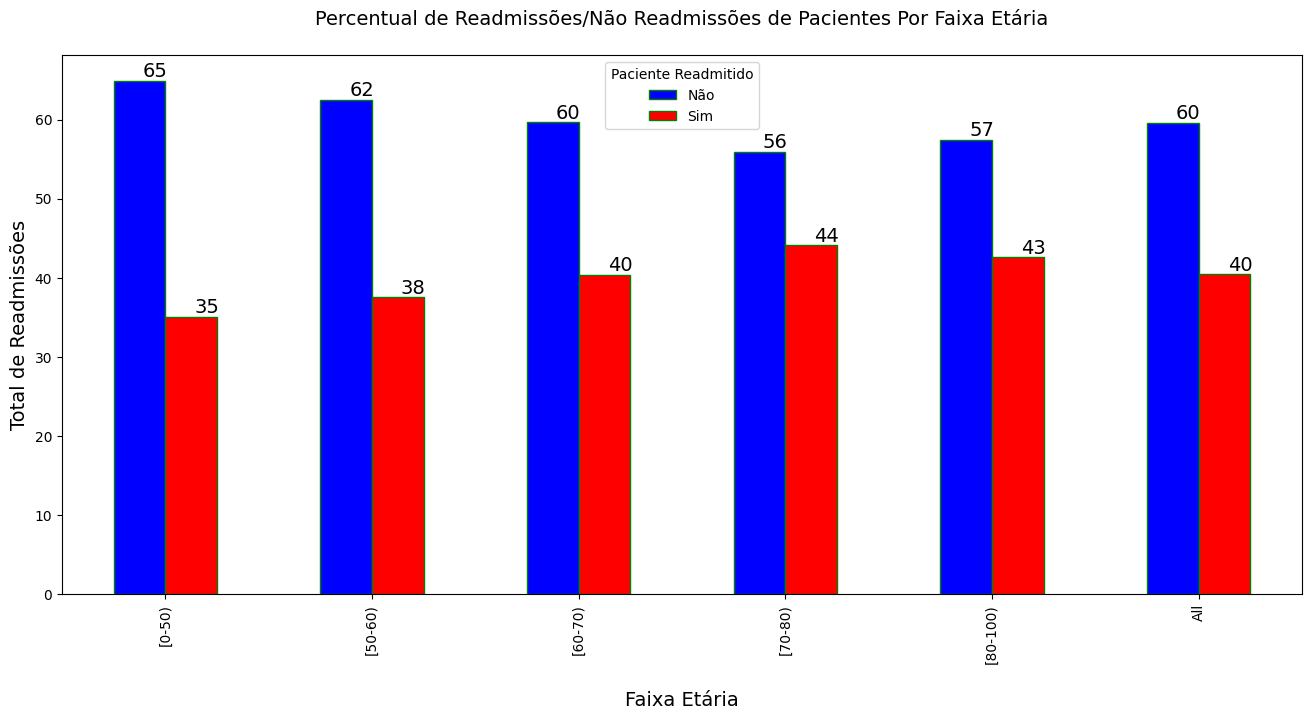

In [10]:
# Gráfico de Barras do Pandas

# Observe que chamamos o plot a partir do dataframe usando nesse caso o Matplotlib
fig = percentual_idade_readmissao.plot(kind = 'bar', 
                                       figsize = (16, 7), 
                                       width = 0.5,
                                       edgecolor = 'g', 
                                       color = ['b', 'r'])

# Legenda
plt.legend(title = 'Paciente Readmitido', labels = ('Não', 'Sim'))

# Label do eixo x
plt.xlabel("\nFaixa Etária", fontsize = 14, color = 'black')

# Label do eixo y
plt.ylabel("Total de Readmissões", fontsize = 14, color = 'black')

# Título
plt.title("Percentual de Readmissões/Não Readmissões de Pacientes Por Faixa Etária\n", fontsize = 14)

# Coloca os totais em cada uma das barras como labels
for p in fig.patches:
    fig.annotate('{:.0f}'.format(p.get_height()), 
                 (p.get_x() + 0.2, p.get_height()), 
                 ha = 'center', 
                 va = 'bottom', 
                 fontsize = 14,
                 color = 'black')

# Mostra o gráfico
plt.show()

> A faixa etária de pacientes entre 70-80 tem o maior percentual de readmissões, enquanto a faixa etária de 0-50 anos tem o menor percentual.

### 5- Total de Readmissões de Pacientes Por Gênero, Por Idade e Por Tipo de Admissão

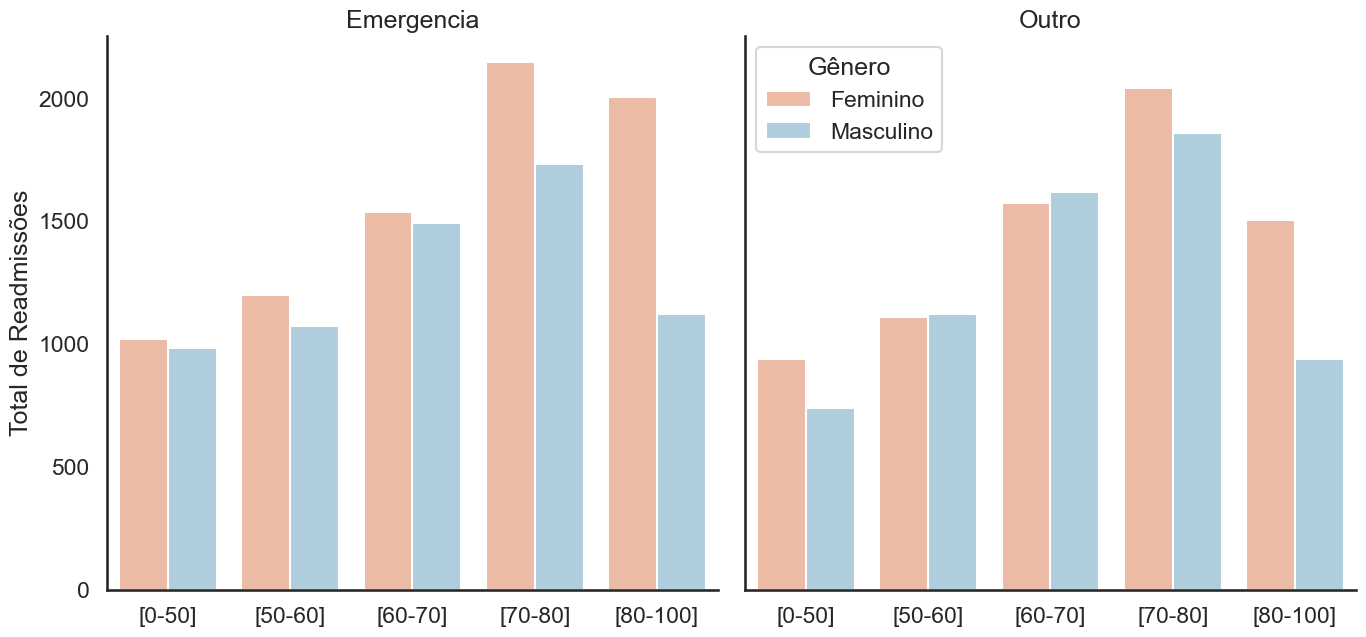

In [11]:
# Catplot (Plot de Categorias com Gráfico de Barras)

# Vamos incluir o background
sns.set(style = "white", context = "talk")

# Criação do gráfico de barras com catplot
# https://seaborn.pydata.org/generated/seaborn.catplot.html#seaborn.catplot
# https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette
g = sns.catplot(x = 'age', 
                y = 'readmitted', 
                hue = 'gender', 
                col = 'admission_type_id',
                estimator = np.sum, 
                data = dados, 
                palette = "RdBu", 
                kind = "bar",
                height = 7, 
                aspect = 1,
                legend = False,
                ci = None)

# Labels
(g.set_axis_labels("", "Total de Readmissões")
 .set_xticklabels(["[0-50]", "[50-60]", "[60-70]", "[70-80]", "[80-100]"])
 .set_titles("{col_name}"))

# Legenda
plt.legend(title = 'Gênero', loc = 'upper left', labels = ['Feminino', 'Masculino'])

# Mostra o gráfico
plt.show(g)

> Mulheres na faixa etária de 70-80 anos têm um número maior de readmissões por emergência.

### 6- Total de Readmissões/Não Readmissões Por Gênero e Por Raça

In [12]:
# Cria um dataframe temporário para ajustar o label da variável target para o plot
df_temp = dados

In [13]:
# Faz o mapeamento de 0 e 1 para labels
df_temp["readmitted"] = df_temp["readmitted"].map({0: "Não Readmitido", 1: "Readmitido"})

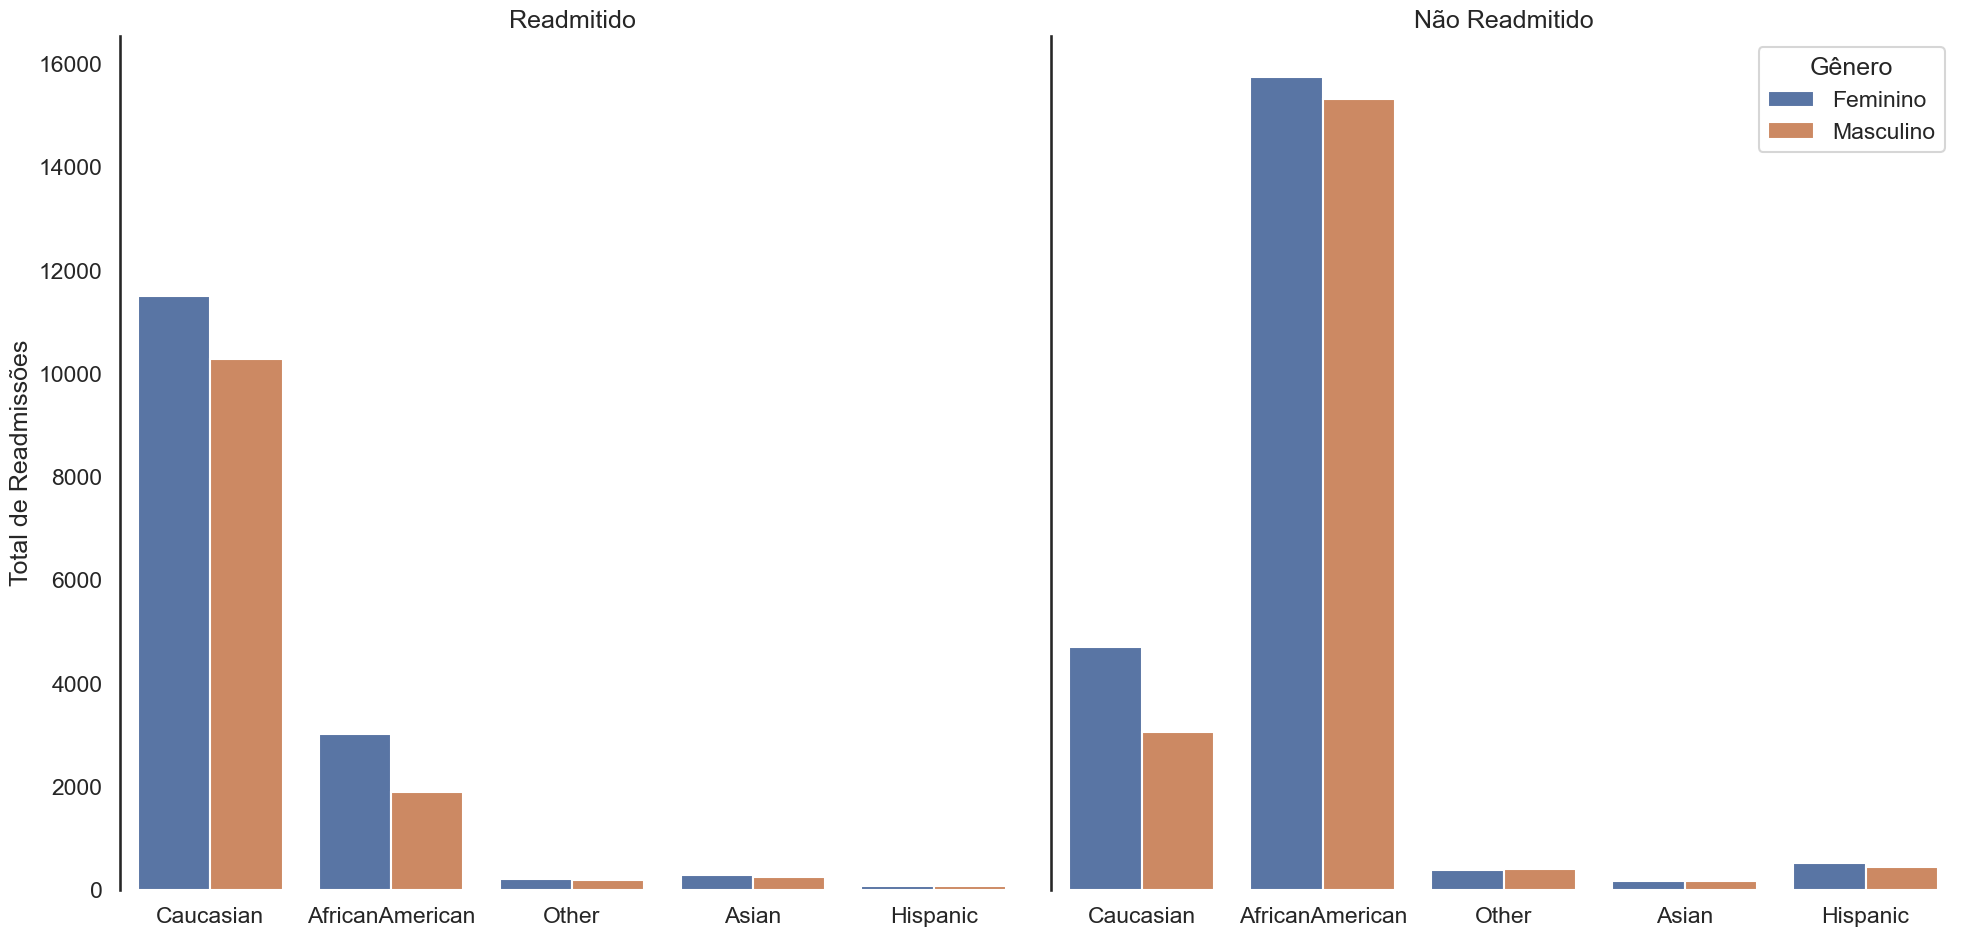

In [14]:
# Facet Grid

# Remove o background
sns.set(style = "white", context = "talk")

# Cria uma função para o countplot
def countplot(x, hue, **kwargs):
    sns.countplot(x = x, hue = hue, **kwargs)

# Cria um facetgrid (usando o dataframe temporário)
grid = sns.FacetGrid(data = df_temp, col = 'readmitted', height = 10, aspect = 1)

# Mapeamento do facetgrid às variáveis
fig = grid.map(countplot, 'race', 'gender', palette = 'deep')

# Labels
(fig.set_axis_labels("", "Total de Readmissões")
 .set_xticklabels(["Caucasian", "AfricanAmerican", "Other", "Asian", "Hispanic"])
 .set_titles('{col_name}'))

# Legenda
plt.legend(title = 'Gênero', loc = 'upper right', labels = ['Feminino', 'Masculino'])

# Remove os contornos do gráfico
sns.despine(bottom = True)

> Mulheres Caucasianas são a maioria entre as mulheres readmitidas.

https://pt.wikipedia.org/wiki/Ra%C3%A7a_caucasiana

### 7- Número de Visitas x Comorbidade

In [15]:
# Criamos a tabela de contigência
num_visitas_comorbidade = pd.crosstab(dados.number_inpatient, dados.comorbidade).sum()
num_visitas_comorbidade

comorbidade
0    15295
1    12868
2    27264
3    13202
dtype: int64

In [16]:
# Tipo
type(num_visitas_comorbidade)

pandas.core.series.Series

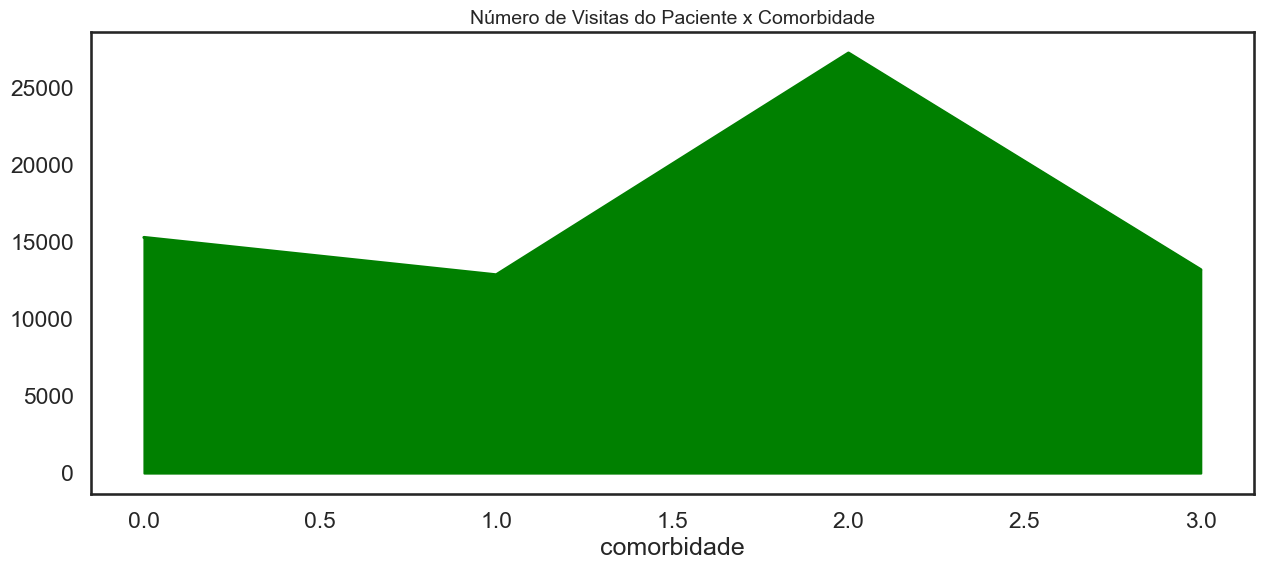

In [17]:
# Gráfico de Área (evite!!!)

# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.html
fig = num_visitas_comorbidade.plot(kind = 'area',
                                   figsize = (15,6),
                                   color = 'Green')

# Coloca os totais em cada uma das barras como labels
for p in fig.patches:
    fig.annotate('{:.0f}'.format(p.get_height()), 
                 (p.get_x() + 0.2, p.get_height()), 
                 ha = 'center', 
                 va = 'bottom', 
                 fontsize = 14,
                 color = 'black')

# Título
plt.title("Número de Visitas do Paciente x Comorbidade", fontsize = 14)
plt.show()

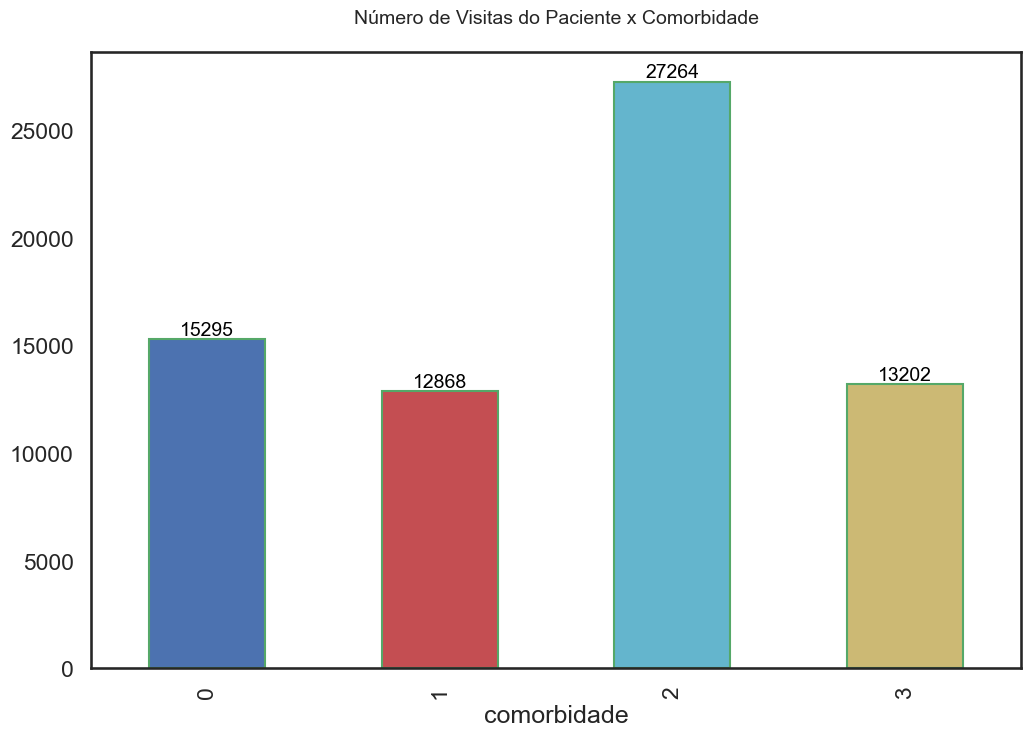

In [18]:
# Grafico de Barras (sempre uma opção mais segura)

# Vamos remover as linhas do background
sns.set(style = "white", context = "talk")

# Cria o gráfico
fig = num_visitas_comorbidade.plot(kind = 'bar',
                                   figsize = (12,8), 
                                   width = 0.5,
                                   edgecolor = 'g', 
                                   color = ['b','r','c','y'],
                                   rot = 90)

# Coloca os totais em cada uma das barras como labels
for p in fig.patches:
    fig.annotate('{:.0f}'.format(p.get_height()), 
                 (p.get_x() + 0.25, p.get_height()), 
                 ha = 'center', 
                 va = 'bottom', 
                 fontsize = 14,
                 color = 'black')

# Título
plt.title("Número de Visitas do Paciente x Comorbidade\n", fontsize = 14)

# Mostra o gráfico
plt.show()

>Pacientes com comorbidade tem o maior número de visitas (consultas médicas).

### 8- Proporção de Readmissões Pelo Número de Visitas Antes da Alta¶

In [19]:
# Tabela de contingência
percent_visitas_readm = pd.crosstab(dados.number_inpatient , dados.readmitted, normalize = 'index') * 100
percent_visitas_readm

readmitted,Não Readmitido,Readmitido
number_inpatient,,
0,62.088788,37.911212
1,45.879397,54.120603
2,34.692557,65.307443
3,29.363450,70.636550
4,24.137931,75.862069
5,20.388350,79.611650
6,12.500000,87.500000
7,10.000000,90.000000
8,16.666667,83.333333


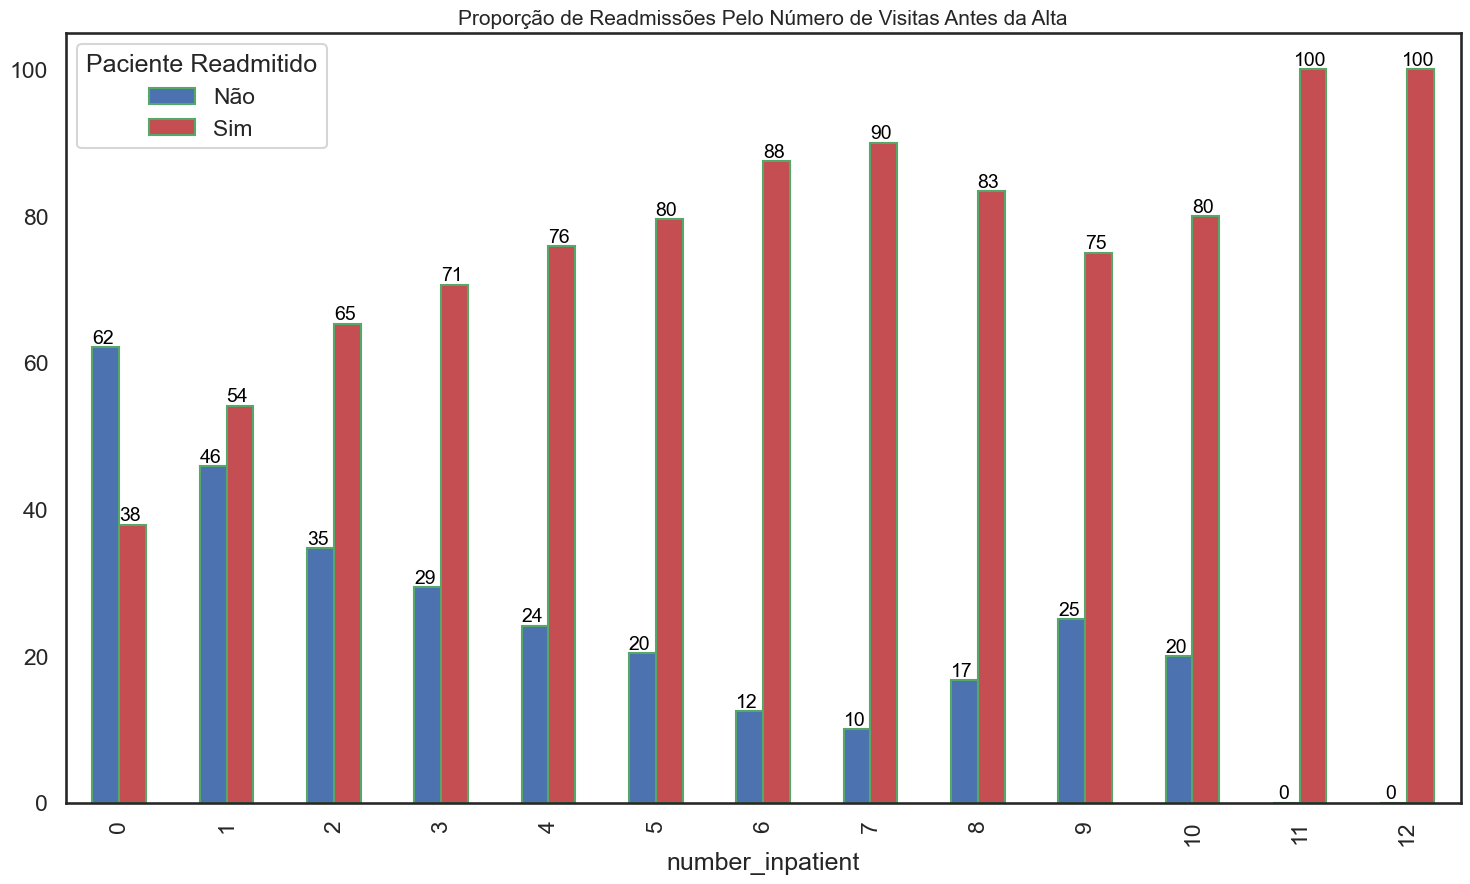

In [20]:
# Gráfico de Barras do Pandas a Partir da Tabela de Contingência

# Cria o gráfico
fig = percent_visitas_readm.plot(kind = 'bar', 
                                 figsize = (18,10), 
                                 width = 0.5, 
                                 edgecolor = 'g', 
                                 color = ['b','r'])

# Coloca os totais em cada uma das barras como labels
for p in fig.patches:
    fig.annotate('{:.0f}'.format(p.get_height()), 
                 (p.get_x() + 0.1, p.get_height()), 
                 ha = 'center', 
                 va = 'bottom', 
                 fontsize = 14,
                 color = 'black')

# Título
plt.title("Proporção de Readmissões Pelo Número de Visitas Antes da Alta", fontsize = 15)

# Legenda
fig.legend(title = 'Paciente Readmitido', labels = ('Não', 'Sim'))

# Mostra o gráfico
plt.show()

Quanto mais visitas o paciente recebeu antes da alta, maior foi o volume de readmissões. Ou seja, quanto mais visitas o paciente recebe, maiores as chances de readmissão.

### 9- Qual a Frequência do Número de Medicamentos Consumidos?

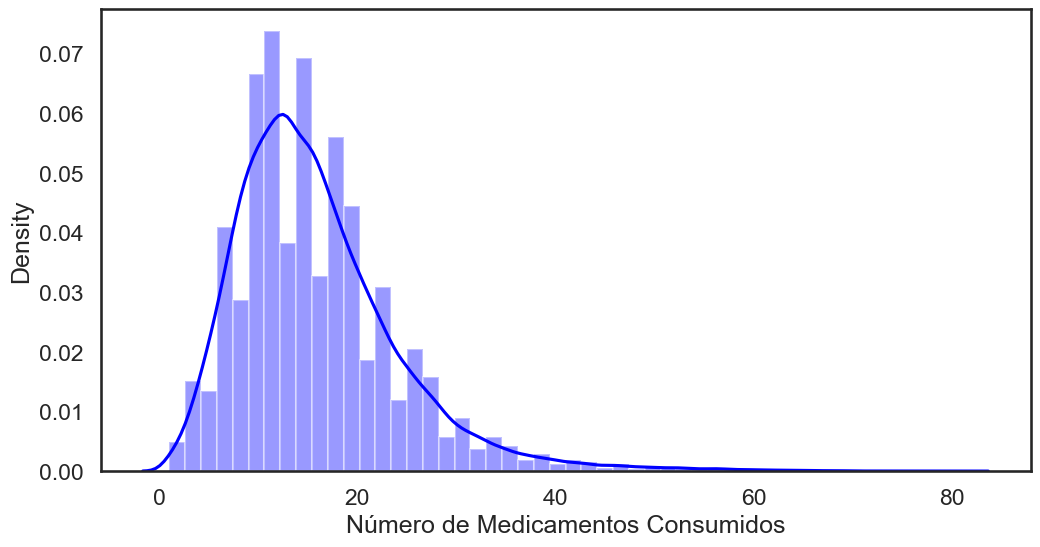

In [21]:
# Histograma (Dist Plot)

# Tamanho da figura
plt.figure(figsize = (12,6))

# Cria o gráfico
sns.distplot(dados['num_medications'], 
             hist = True, 
             color = 'Blue', 
             axlabel = "Número de Medicamentos Consumidos");

> A maioria dos pacoentes consumiu entre 5 e 20 medicamentos.

### Stacked Histogramas

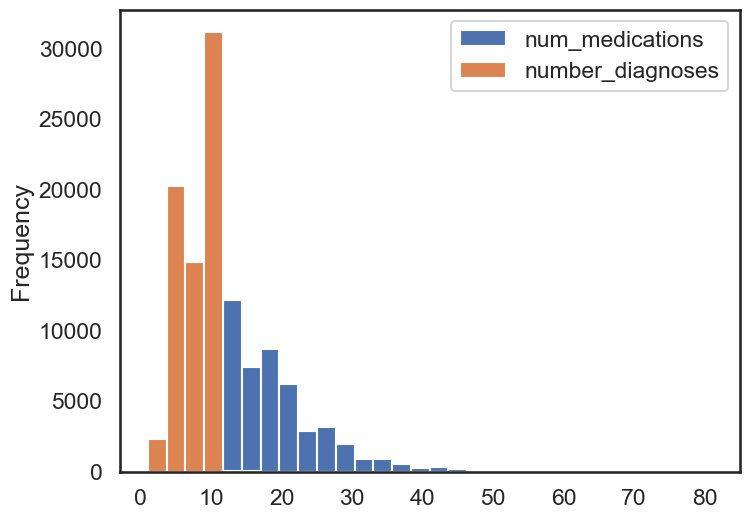

In [22]:
# Dois histogramas para duas variáveis no mesmo gráfico (evite!!!)
dados[["num_medications", "number_diagnoses"]].plot(bins = 30, kind = "hist", figsize = (8,6));

### Histogramas da Mesma Variável Por Diferentes Classes

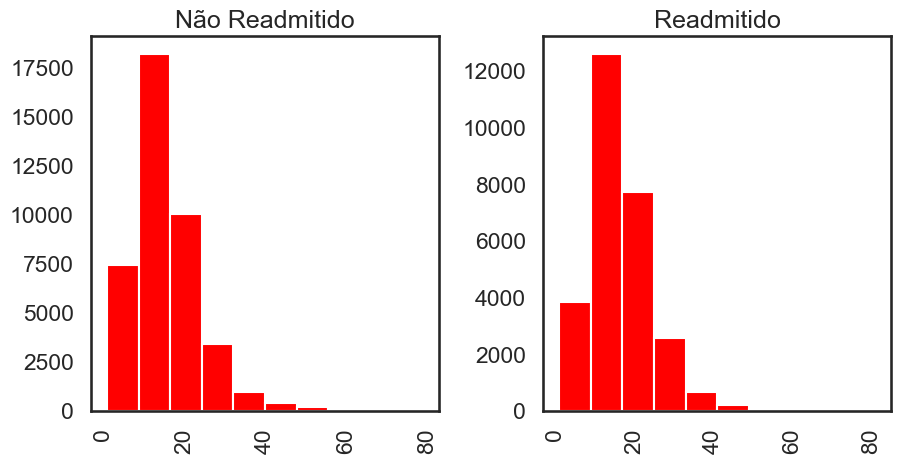

In [23]:
# Pode ser uma boa opção
dados[["num_medications"]].hist(by = dados.readmitted, figsize = (10,5), color = 'Red');

### 10- Comportamento do Paciente Por Procedimentos Clínicos

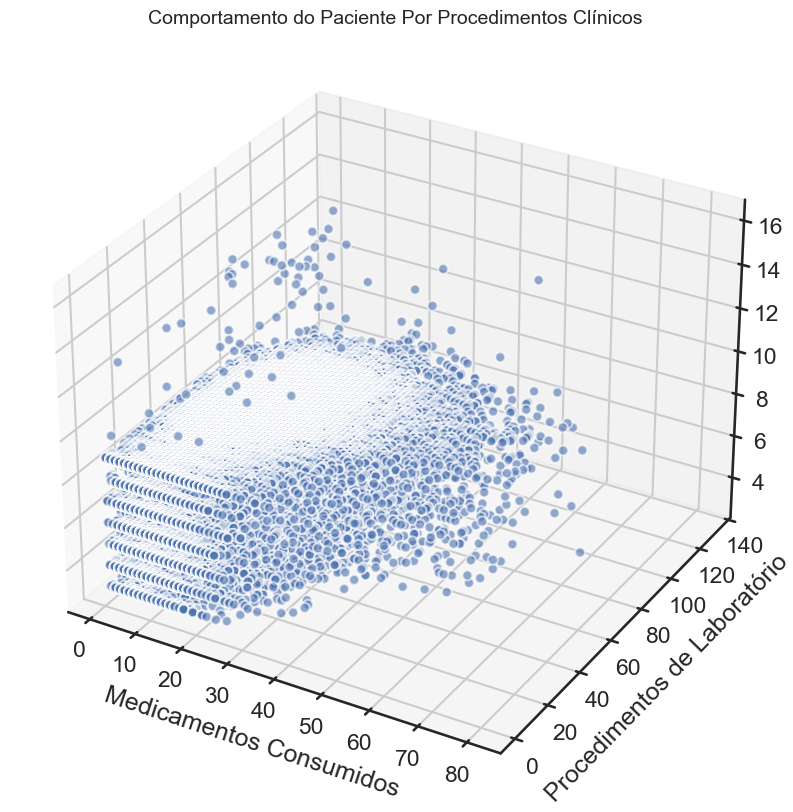

In [24]:
# Projeção 3D (EVITE ISSO!!!!!)

# Tamanho da figura
fig = plt.figure(figsize = (14, 10))

# Subplots
ax = fig.add_subplot(111, projection = '3d')

# Dimensões
xs = dados['num_medications']
ys = dados['num_lab_procedures']
zs = dados['number_diagnoses']

# Gráfico de pontos
ax.scatter(xs, ys, zs, s = 50, alpha = 0.6, edgecolors = 'w')

# Labels
ax.set_xlabel('\nMedicamentos Consumidos')
ax.set_ylabel('\nProcedimentos de Laboratório')
ax.set_zlabel('\nDiganósticos')

# Título
plt.title("Comportamento do Paciente Por Procedimentos Clínicos", fontsize = 14)

# Mostra o gráfico
plt.show()

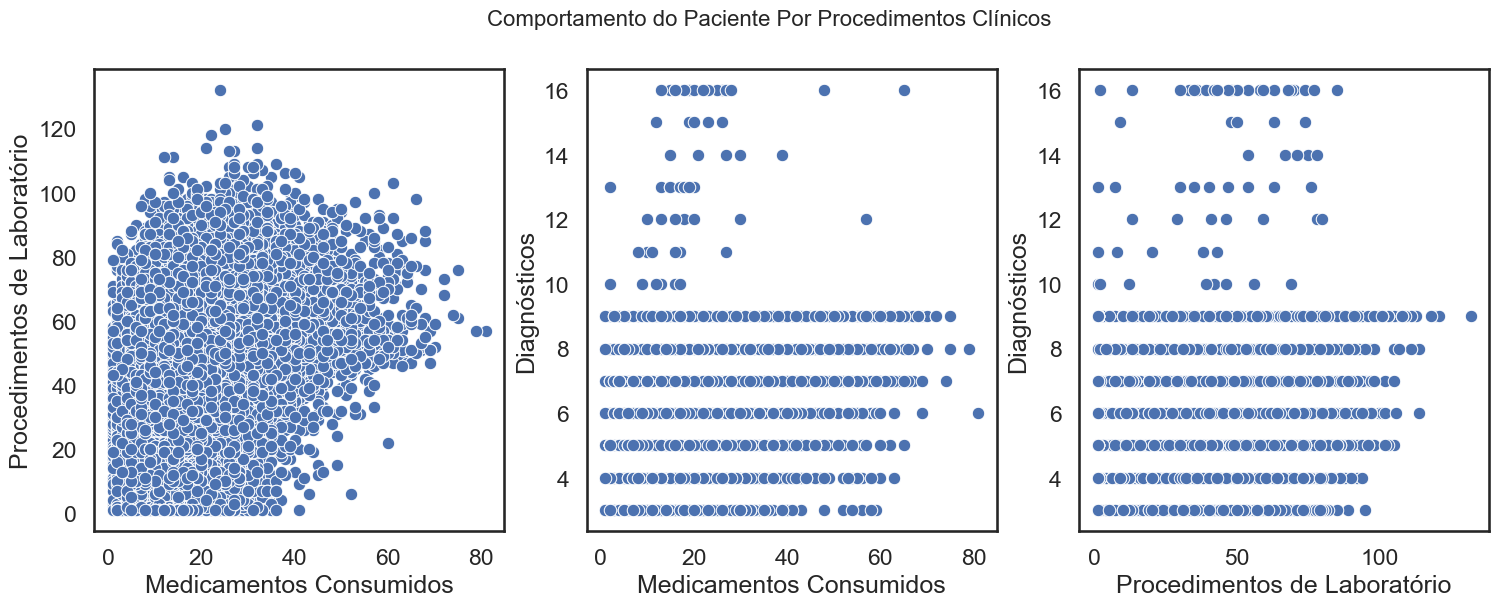

In [25]:
# Plot 2D (USE ISSO!!!!)

# Criando gráficos 2D
fig, axs = plt.subplots(1, 3, figsize = (18, 6))

# Gráfico de Medicamentos Consumidos vs. Procedimentos de Laboratório
sns.scatterplot(x = dados['num_medications'], y = dados['num_lab_procedures'], data = dados, ax = axs[0])
axs[0].set_xlabel('Medicamentos Consumidos')
axs[0].set_ylabel('Procedimentos de Laboratório')

# Gráfico de Medicamentos Consumidos vs. Diagnósticos
sns.scatterplot(x = dados['num_medications'], y = dados['number_diagnoses'], data = dados, ax = axs[1])
axs[1].set_xlabel('Medicamentos Consumidos')
axs[1].set_ylabel('Diagnósticos')

# Gráfico de Procedimentos de Laboratório vs. Diagnósticos
sns.scatterplot(x = dados['num_lab_procedures'], y = dados['number_diagnoses'], data = dados, ax = axs[2])
axs[2].set_xlabel('Procedimentos de Laboratório')
axs[2].set_ylabel('Diagnósticos')

# Título
plt.suptitle("Comportamento do Paciente Por Procedimentos Clínicos", fontsize = 16)

# Mostra os gráficos
plt.show()

> Há relação positiva entre procedimentos de laboratório e medicamentos consumidos.

# Fim!